In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd
import numpy as np

df = pd.read_json('/content/drive/MyDrive/VADER_normalized.json')

print(df.head())

   Label  Number_of_words  Number_of_sentences  Number_of_caps  \
0      0         0.002822             0.010152        0.001144   
1      0         0.020106             0.015228        0.002859   
2      0         0.014109             0.030457        0.003431   
3      0         0.010582             0.020305        0.004002   
4      0         0.019400             0.015228        0.002859   

   Number_of_punctuation  Number_of_nouns  Number_of_verbs  \
0               0.005357         0.005908         0.009615   
1               0.012500         0.026588         0.025000   
2               0.017857         0.013294         0.023077   
3               0.008929         0.013294         0.019231   
4               0.010714         0.023634         0.019231   

   Number_of_adjectives  Number_of_adverbs  Average_word_length  ...  \
0              0.007663           0.009174             0.123009  ...   
1              0.038314           0.022936             0.200208  ...   
2             

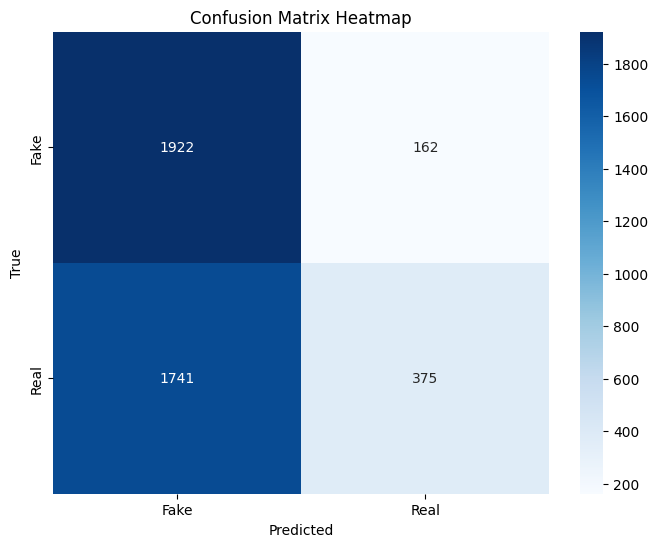


Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.92      0.67      2084
           1       0.70      0.18      0.28      2116

    accuracy                           0.55      4200
   macro avg       0.61      0.55      0.48      4200
weighted avg       0.61      0.55      0.47      4200

10-fold Cross Validation Accuracy: 0.5456 ± 0.0408


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB  # Use MultinomialNB if the features are counts
from sklearn.metrics import classification_report
import numpy as np


X = df.drop(columns=['Label'])
y = df['Label']


X = X.fillna(X.mean())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

# Create Naive Bayes model
model = GaussianNB()

model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cv_scores = cross_val_score(model, X, y, cv=10)

print(f"10-fold Cross Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")